# Analysis of the synthetic calibration of the equilirium MD1 runs

## 20% parameter variance (corrected verions)

In [233]:
import sys,os
# get utils path (one fodelr up)
curr_dir = os.getcwd()
one_folder_up = os.path.dirname(curr_dir)
sys.path.append(one_folder_up)
import numpy as np
import pandas as pd
import utils as ut
from matplotlib import pyplot as plt
%matplotlib inline

check the spread in the results w.r.t. targets

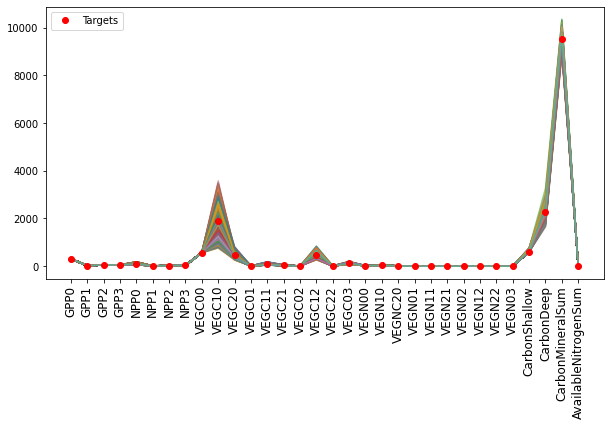

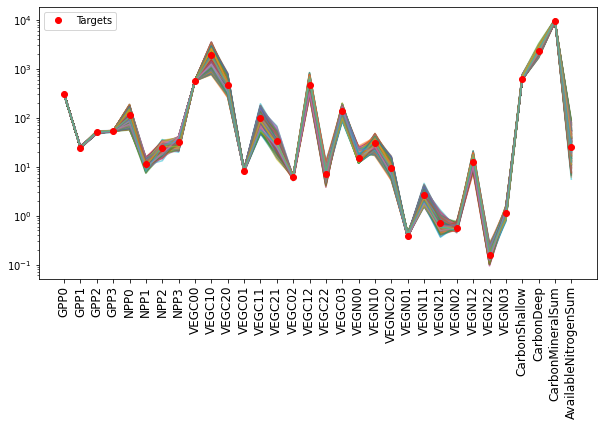

In [234]:
sa_path='20_percent/check_all-run/'
model='results.csv'
params='sample_matrix.csv'
df_model = pd.read_csv(sa_path+model,header=None)
df_param = pd.read_csv(sa_path+params)
#print(df_param.head())


model_header =  ['GPP0','GPP1','GPP2','GPP3',\
                 'NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03','CarbonShallow','CarbonDeep',\
                 'CarbonMineralSum','AvailableNitrogenSum'
                   ]
df_model.columns = model_header
df_model.head()

param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22',
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22',\
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22',\
               'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'
               ]
df_param.columns = param_header

df_model.head()
df_param.head()

ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

# Workflow:
## Above-ground
### (1) cmax -> GPP
### (2) nmax, krb -> NPP, VEGC
### (3) cfall -> NPP, VEGC
### (4) nfall -> NPP, VEGC,VEGN
## Below-ground
### (5) soil param -> NPP, VEGC,VEGN, SoilC

In [235]:
def par_value_minus_mean_box_plot(df_x,x_true):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    xx=df_x.copy()
    xx.loc[len(df_x.index)] = pd.Series(x_true, index=df_x.columns)
    
    fig, ax = plt.subplots(1,2,figsize=(14, 4))
    
    ax[0].boxplot((xx-xx.iloc[-1]).iloc[:-1,:].values, labels=xx.columns);
    ax[0].plot(np.zeros(len(xx.columns)+2),'--',color='black',alpha=0.5)
    ax[0].set_xticks(range(1, len(xx.columns) + 1))
    ax[0].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    ax[0].set_xlim([0,len(xx.columns)+1])
    ax[0].set_ylabel('Modeled-Observed', fontsize=12)
            
    std_devs = np.std((xx-xx.iloc[-1]).iloc[:-1,:], axis=0)
    ax[1].bar(range(1, len(xx.columns) + 1), std_devs, tick_label=xx.columns)
    ax[1].set_xticks(range(1, len(xx.columns) + 1))
    ax[1].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    #ax[1].set_title("Standard Deviation of Parameters' Deviations", fontsize=14)
    #ax[1].set_xlabel('Parameter', fontsize=12)
    ax[1].set_ylabel('Standard Deviation', fontsize=12)


In [236]:
path='20_percent/csv-files/'
model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_header
df_model

,GPP0,GPP1,GPP2,GPP3
0,306.987830,24.170209,64.424002,47.733915
1,307.170002,24.609999,50.009993,52.870001
2,410.892065,41.361934,47.995694,10.762071
3,307.170141,24.610003,50.009986,52.869999
4,307.169911,24.610095,50.010144,52.870034
5,307.169918,24.610015,50.010034,52.870008
6,307.168145,24.610198,50.008995,52.869718
7,307.169917,24.610022,50.010036,52.870008
8,307.170006,24.610009,50.010014,52.869999
9,307.167253,24.609882,50.009801,52.869980


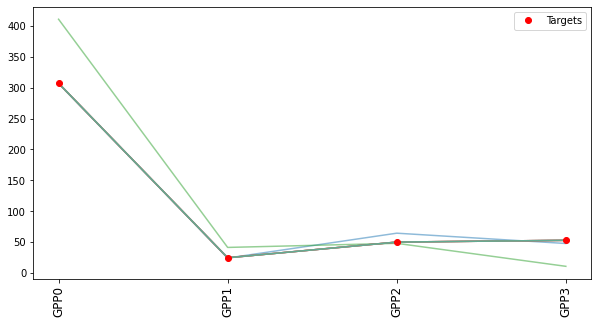

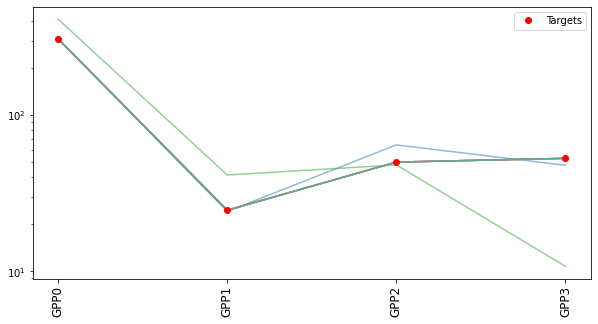

In [237]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

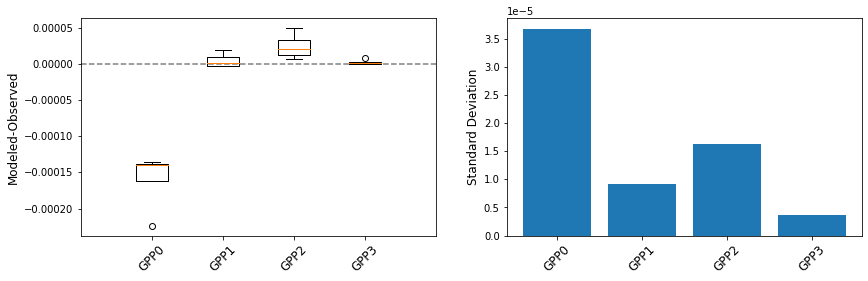

In [238]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

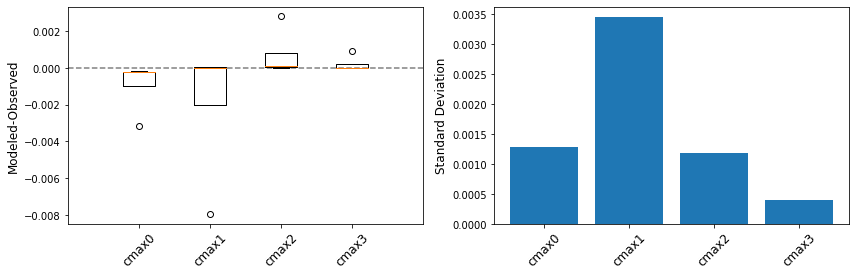

In [239]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,cmax_true_params)

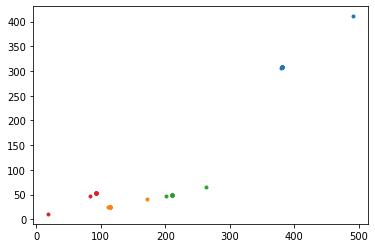

In [196]:
plt.plot(df_param,df_model.iloc[:10,:],'.');

In [205]:
from sklearn.metrics import mean_squared_error
target_e=[]
for i in range(10):
    row = df_model.iloc[i,:]
    target_e.append(mean_squared_error(df_model.iloc[-1,:], row))
target_e

cmax_true_params = [381.19, 113.93, 210.48, 93.31]
param_e=[]
for i in range(10):
    row = df_param.iloc[i,:]
    param_e.append(mean_squared_error(cmax_true_params, row))
param_e

[745.3163968417531,
 2.0146731339064273e-05,
 5265.336082828556,
 2.054311601767961e-05,
 2.0960649354559506e-05,
 2.004675246600489e-05,
 3.4324106584967874e-05,
 2.0199260350845382e-05,
 2.0225765955688622e-05,
 1.7179442211234383e-05]

In [ ]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
par_value_minus_mean_box_plot(xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10,:-6],cmax_true_params)


In [191]:
xparams_MD1.sort_values(by=[rmetric],ascending=order).iloc[:,:-6]

,cmax0,cmax1,cmax2,cmax3
1,381.192983,113.937936,210.477194,93.309090
8,381.192995,113.937980,210.477276,93.309086
5,381.192880,113.938005,210.477352,93.309100
7,381.192901,113.938041,210.477371,93.309101
3,381.193177,113.937958,210.477186,93.309088
4,381.192880,113.938363,210.477789,93.309148
6,381.187283,113.938274,210.472294,93.308557
9,381.189630,113.937371,210.476348,93.309047
0,379.718137,110.838629,263.973156,82.916498
2,491.029338,171.855249,201.709979,18.714985


array([5.85923552e+01, 1.34833606e-11, 3.20400728e+03, 5.04122594e-09,
       9.71357757e-09, 2.05891385e-09, 1.14262066e-06, 2.15978605e-09,
       7.45751842e-11, 1.90027118e-06])

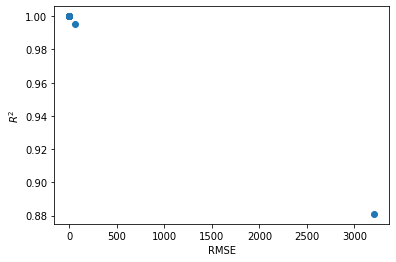

In [132]:
ut.plot_r2_rmse(df_model)

In [133]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

,cmax0,cmax1,cmax2,cmax3,$R^2$,RMSE,MAPE,COMBINED_ACC
0,379.718137,110.838629,263.973156,82.916498,0.995503,5.859236e+01,8.753094e-02,0.948402
1,381.192983,113.937936,210.477194,93.309090,1.000000,1.348336e-11,4.684325e-08,1.000000
3,381.193177,113.937958,210.477186,93.309088,1.000000,5.041226e-09,2.157501e-07,1.000000
4,381.192880,113.938363,210.477789,93.309148,1.000000,9.713578e-09,1.917451e-06,0.999999
5,381.192880,113.938005,210.477352,93.309100,1.000000,2.058914e-09,4.272302e-07,1.000000
6,381.187283,113.938274,210.472294,93.308557,1.000000,1.142621e-06,9.878758e-06,0.999996
7,381.192901,113.938041,210.477371,93.309101,1.000000,2.159786e-09,5.094758e-07,1.000000
8,381.192995,113.937980,210.477276,93.309086,1.000000,7.457518e-11,1.681360e-07,1.000000
9,381.189630,113.937371,210.476348,93.309047,1.000000,1.900271e-06,4.525559e-06,0.999998


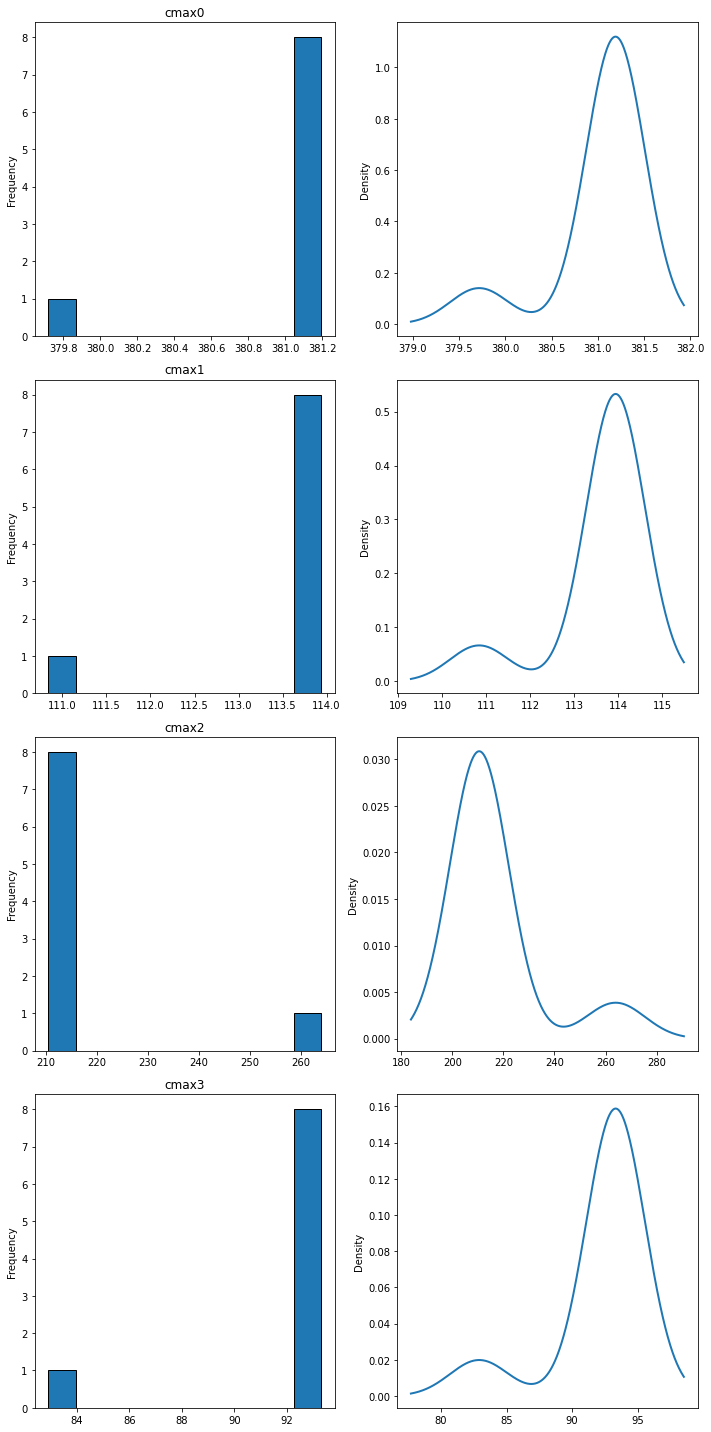

In [134]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [266]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)
#z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:5],df_model)

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
5,93.036651,4.561938,2.884032,32.298530,571.804919,1528.721313,386.014371,6.244694,14.428999,8.390719,...,604.330170,1139.901240,4662.191974,15.391561,1.000000,0.232629,0.011855,1.000000,0.000304,0.106270
7,92.560354,4.520023,2.865035,32.299501,571.491821,1522.545764,384.431143,6.224414,14.034912,8.353986,...,604.236874,1139.199866,4662.284558,15.510142,0.999999,0.583987,0.013542,0.991306,0.000763,0.121401
0,91.101982,4.395089,2.801366,32.299038,571.235138,1504.885840,379.849893,6.167926,13.043228,8.438562,...,603.266406,1140.521000,4666.473418,15.272514,0.999978,18.531413,0.026422,0.914963,0.024216,0.238087
8,90.859246,4.373039,2.787552,32.298477,571.275146,1504.028589,379.570230,6.160169,12.997582,8.507337,...,603.389174,1141.275843,4666.722865,15.434313,0.999976,20.141384,0.027692,0.907538,0.026320,0.249632
9,89.853434,4.288843,2.751130,32.300894,570.599323,1489.507996,375.947342,6.115040,12.088006,8.120915,...,603.078567,1136.635664,4665.108892,15.136445,0.999936,53.077749,0.040438,0.822048,0.069359,0.369077
4,88.677044,4.182955,2.692093,32.299642,570.545062,1482.569543,374.016824,6.061773,11.606646,8.097690,...,602.099714,1137.386302,4668.308107,15.725857,0.999908,76.005255,0.049025,0.763970,0.099320,0.450562
2,96.967214,4.965112,3.047160,32.297348,573.093018,1595.170410,402.527451,6.404292,19.083084,8.281326,...,605.061147,1141.955821,4672.199103,16.275118,0.999778,185.796394,0.057777,0.648190,0.242790,0.572017
1,85.954255,3.962952,2.569098,32.296305,570.301709,1448.336792,365.170352,5.942549,9.877080,8.031134,...,602.753462,1140.274664,4664.902467,13.231595,0.999714,235.320640,0.083845,0.485024,0.307506,0.812090
3,100.307633,5.455486,3.236494,32.303026,573.026385,1650.115503,416.056052,6.544950,24.982721,9.492244,...,603.323675,1139.280508,4663.701895,21.093561,0.999295,590.146281,0.102054,0.161379,0.771174,1.196522
6,101.761696,5.723597,3.348518,32.307308,573.184235,1665.923474,420.202368,6.606208,27.356123,8.730092,...,607.765788,1159.663618,4658.927164,16.381131,0.999088,765.257007,0.111553,-0.000912,1.000000,1.414214


In [261]:
def z_score(y_short,y_long):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    '''
    zscore=[]
    print('mean-obs','std')
    for iname in y_long.columns:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
        print (y_short[iname].mean()-y_long[iname].iloc[-1],y_short[iname].std())
    df_z = pd.DataFrame(zscore)
    df_z.index = y_long.columns
    
    return df_z

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
0.3079508929373844 5.08158270991865
0.10290343732747598 0.5663866853011706
0.02824788565107106 0.24375695030172803
6.837099789436252e-06 0.0031593210669717754
-0.1043243408203125 1.0972002753570986
12.870522460937536 73.20280305215131
2.9986026000976835 18.408637108249103
0.007201619148253791 0.21115181933735044
1.6598381614685103 5.919019066479687
0.02440036296844461 0.42385553366296747
0.007583954334259069 0.1252755108029852
0.783541946411134 3.7125361637315915
0.004393941760063136 0.06686350748019061
0.0071185302734591005 0.014510803754289753
0.0009911251068128735 0.022649251166262655
0.21548229217529524 1.0526226746411724
0.0640091133117684 0.36814647306991416
-0.0016824528574944098 0.009727794203914843
0.040605839192867255 0.1484736971877824
-0.004895240217447333 0.01204051067053332
0.0003566953539848039 0.011643100074061663
0.02340966403484357 0.09520264749725585
0.0038730975799261998 0.001460463233889894
0.003771924972534313 0.0001216298831088361
-0.5395024156571253

,0
NPP0,0.060601
NPP1,0.181684
NPP2,0.115885
NPP3,0.002164
VEGC00,-0.095082
VEGC10,0.175820
VEGC20,0.162891
VEGC01,0.034106
VEGC11,0.280425
VEGC21,0.057568


In [136]:
nelem=5
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
-3.2567978109909745e-06 9.154018302086402e-05
9.600520137098556e-06 9.193731675755287e-06
1.249313354634296e-05 2.296442278370029e-05
3.0517578082367436e-06 4.612965158458965e-06


,0
GPP0,-0.035578
GPP1,1.044246
GPP2,0.544021
GPP3,0.661561


In [137]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,381.192983,113.937936,210.477194,93.309090,1.000000,1.348336e-11,4.684325e-08,1.000000,4.325277e-15,4.062700e-08
8,381.192995,113.937980,210.477276,93.309086,1.000000,7.457518e-11,1.681360e-07,1.000000,2.395440e-14,1.458238e-07
5,381.192880,113.938005,210.477352,93.309100,1.000000,2.058914e-09,4.272302e-07,1.000000,6.611102e-13,3.705353e-07
7,381.192901,113.938041,210.477371,93.309101,1.000000,2.159786e-09,5.094758e-07,1.000000,6.935119e-13,4.418667e-07
3,381.193177,113.937958,210.477186,93.309088,1.000000,5.041226e-09,2.157501e-07,1.000000,1.618709e-12,1.871193e-07
4,381.192880,113.938363,210.477789,93.309148,1.000000,9.713578e-09,1.917451e-06,0.999999,3.118991e-12,1.662999e-06
6,381.187283,113.938274,210.472294,93.308557,1.000000,1.142621e-06,9.878758e-06,0.999996,3.668921e-10,8.567814e-06
9,381.189630,113.937371,210.476348,93.309047,1.000000,1.900271e-06,4.525559e-06,0.999998,6.101717e-10,3.925002e-06
0,379.718137,110.838629,263.973156,82.916498,0.995503,5.859236e+01,8.753094e-02,0.948402,1.883191e-02,7.821619e-02
2,491.029338,171.855249,201.709979,18.714985,0.880980,3.204007e+03,1.153008e+00,-0.119020,1.007058e+00,1.419213e+00


In [138]:
df_model.iloc[-1]

GPP0    307.17
GPP1     24.61
GPP2     50.01
GPP3     52.87
Name: 10, dtype: float64

In [139]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,GPP0,GPP1,GPP2,GPP3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,307.170002,24.609999,50.009993,52.870001,1.000000,1.348336e-11,4.684325e-08,1.000000,4.325277e-15,4.062700e-08
8,307.170006,24.610009,50.010014,52.869999,1.000000,7.457518e-11,1.681360e-07,1.000000,2.395440e-14,1.458238e-07
5,307.169918,24.610015,50.010034,52.870008,1.000000,2.058914e-09,4.272302e-07,1.000000,6.611102e-13,3.705353e-07
7,307.169917,24.610022,50.010036,52.870008,1.000000,2.159786e-09,5.094758e-07,1.000000,6.935119e-13,4.418667e-07
3,307.170141,24.610003,50.009986,52.869999,1.000000,5.041226e-09,2.157501e-07,1.000000,1.618709e-12,1.871193e-07
4,307.169911,24.610095,50.010144,52.870034,1.000000,9.713578e-09,1.917451e-06,0.999999,3.118991e-12,1.662999e-06
6,307.168145,24.610198,50.008995,52.869718,1.000000,1.142621e-06,9.878758e-06,0.999996,3.668921e-10,8.567814e-06
9,307.167253,24.609882,50.009801,52.869980,1.000000,1.900271e-06,4.525559e-06,0.999998,6.101717e-10,3.925002e-06
0,306.987830,24.170209,64.424002,47.733915,0.995503,5.859236e+01,8.753094e-02,0.948402,1.883191e-02,7.821619e-02
2,410.892065,41.361934,47.995694,10.762071,0.880980,3.204007e+03,1.153008e+00,-0.119020,1.007058e+00,1.419213e+00


In [140]:
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
1,381.192983,113.937936,210.477194,93.309090,1.000000,1.348336e-11,4.684325e-08,1.000000,4.325277e-15,4.062700e-08
8,381.192995,113.937980,210.477276,93.309086,1.000000,7.457518e-11,1.681360e-07,1.000000,2.395440e-14,1.458238e-07
5,381.192880,113.938005,210.477352,93.309100,1.000000,2.058914e-09,4.272302e-07,1.000000,6.611102e-13,3.705353e-07
7,381.192901,113.938041,210.477371,93.309101,1.000000,2.159786e-09,5.094758e-07,1.000000,6.935119e-13,4.418667e-07
3,381.193177,113.937958,210.477186,93.309088,1.000000,5.041226e-09,2.157501e-07,1.000000,1.618709e-12,1.871193e-07
4,381.192880,113.938363,210.477789,93.309148,1.000000,9.713578e-09,1.917451e-06,0.999999,3.118991e-12,1.662999e-06
6,381.187283,113.938274,210.472294,93.308557,1.000000,1.142621e-06,9.878758e-06,0.999996,3.668921e-10,8.567814e-06
9,381.189630,113.937371,210.476348,93.309047,1.000000,1.900271e-06,4.525559e-06,0.999998,6.101717e-10,3.925002e-06
0,379.718137,110.838629,263.973156,82.916498,0.995503,5.859236e+01,8.753094e-02,0.948402,1.883191e-02,7.821619e-02
2,491.029338,171.855249,201.709979,18.714985,0.880980,3.204007e+03,1.153008e+00,-0.119020,1.007058e+00,1.419213e+00


## (2) nmax, krb -> NPP, VEGC

In [240]:
model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,113.200069,11.350807,23.916004,32.332375,573.453369,1894.016272,474.521140,8.470479,98.898501,33.210559,6.195064,477.829767,6.212789,136.159987
1,112.989796,11.249523,24.373125,32.337758,573.937964,1893.346216,468.188300,8.270424,98.854791,33.219066,6.270416,479.270752,7.156464,136.175331
2,113.305199,11.266942,23.964491,32.401296,572.137915,1893.785413,474.331067,8.221040,98.858701,33.164425,6.038229,477.659186,7.364993,136.486902
3,110.255257,13.399846,23.532047,30.177505,567.941339,1896.728064,451.330417,8.364335,132.933621,44.533907,5.877487,488.675180,5.903953,127.259229
4,113.392177,11.340914,23.757465,32.417245,571.826324,1894.031592,474.508356,8.407049,98.827341,33.188197,5.879291,477.894452,6.331361,136.536945


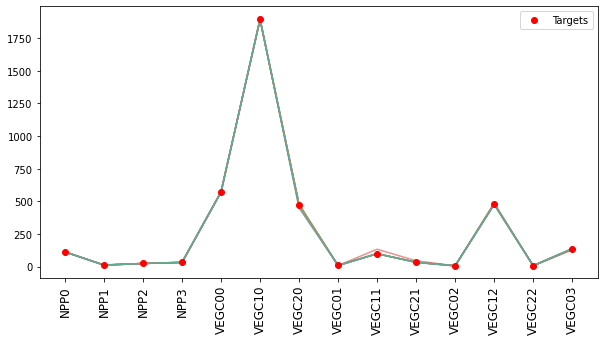

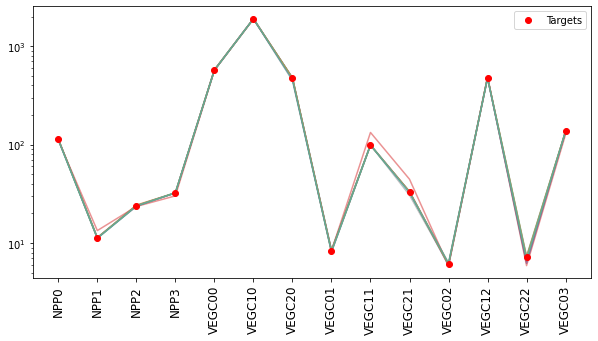

In [241]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

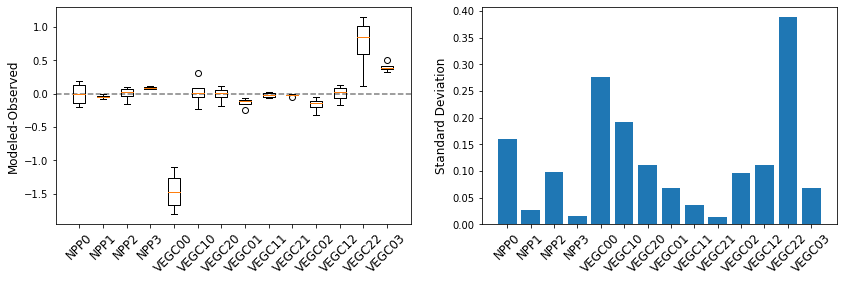

In [242]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

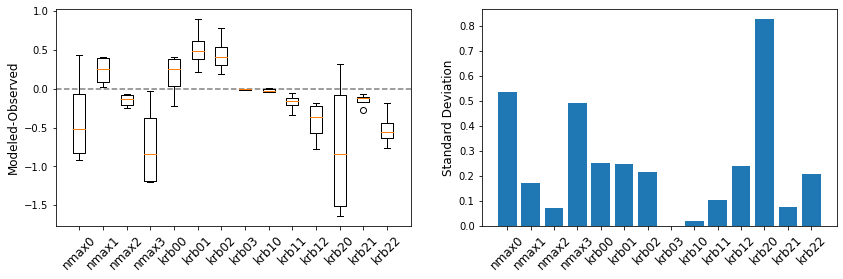

In [243]:
nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,nmax_krb_true_params)

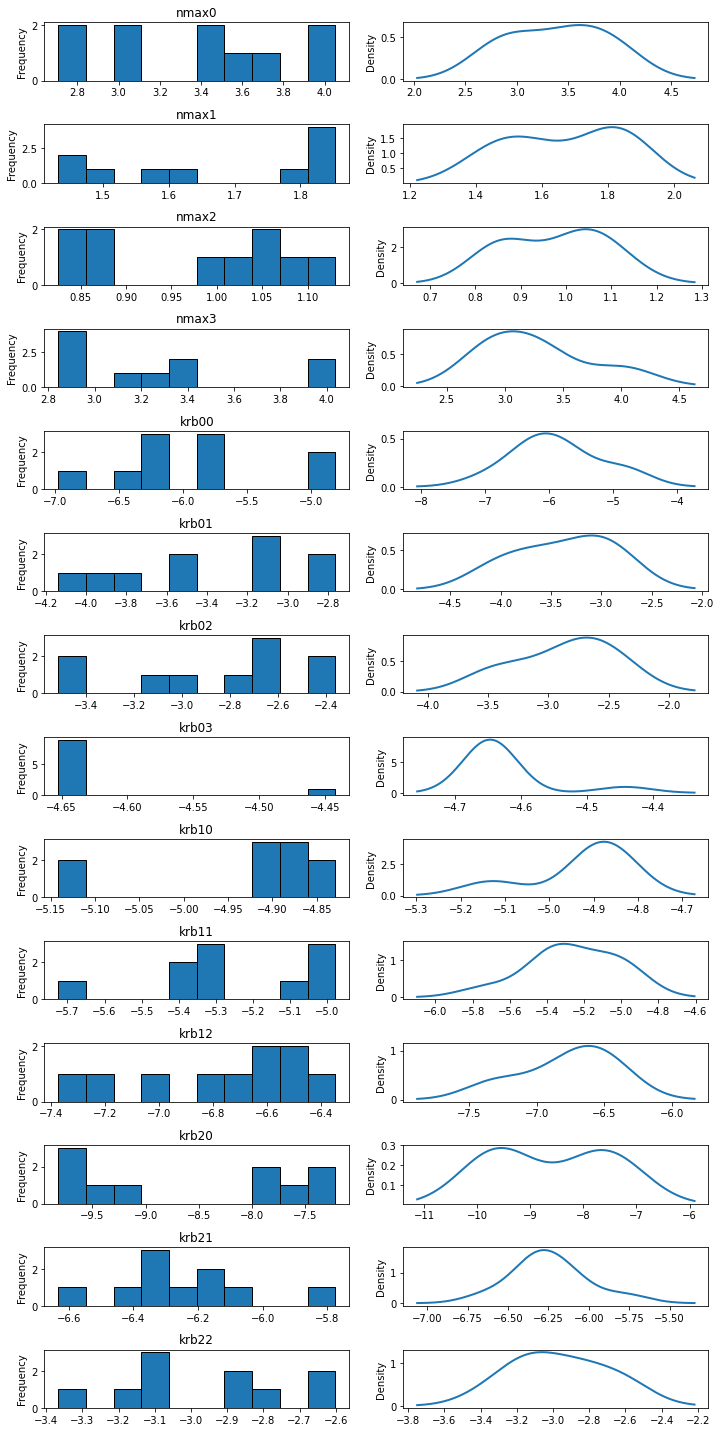

In [143]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [227]:
from sklearn.metrics import mean_squared_error
target_e=[]
for i in range(10):
    row = df_model.iloc[i,:]
    target_e.append(mean_squared_error(df_model.iloc[-1,:], row))
target_e



param_e=[]
for i in range(10):
    row = df_param.iloc[i,:]
    param_e.append(mean_squared_error(nmax_krb_true_params, row))
param_e

[0.07933927713941537,
 0.1337241427232581,
 0.10426080010269449,
 0.3157724612838112,
 0.24637647530164683,
 0.25598855432969386,
 0.07100521692838778,
 0.1768992214007173,
 0.23583088842311478,
 0.41700294317195236]

In [144]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:8].iloc[:,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])


nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,nmax0,nmax1,nmax2,nmax3,krb00,krb01,krb02,krb03,krb10,krb11,krb12,krb20,krb21,krb22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,2.706250,1.845434,0.989943,4.007583,-6.341983,-3.066330,-2.675072,-4.649381,-4.857358,-5.321711,-6.705722,-7.662135,-6.337571,-3.366974,1.000000,0.021576,0.004955,0.983664,0.000145,0.057600
8,4.052477,1.826903,0.878016,2.842614,-5.716555,-3.524217,-2.792056,-4.652611,-4.907957,-5.117818,-6.966432,-9.628113,-6.181219,-3.130366,1.000000,0.051173,0.003712,0.990980,0.000345,0.043151
4,2.816661,1.452113,0.824981,2.855537,-5.737933,-3.753665,-2.362486,-4.650596,-4.907898,-5.037220,-7.252648,-9.446338,-6.128077,-2.789940,1.000000,0.088815,0.014518,0.926389,0.000599,0.168755
5,3.008356,1.512406,1.065105,3.175150,-5.712105,-2.843005,-2.631581,-4.649055,-4.910332,-5.395128,-6.643325,-9.792439,-6.410702,-2.875147,1.000000,0.116045,0.012295,0.939558,0.000782,0.142919
0,3.619083,1.432544,1.071463,4.036615,-6.121976,-3.969859,-3.139001,-4.641786,-4.870697,-4.982540,-6.472593,-7.987146,-6.066339,-2.604856,0.999999,0.164988,0.013924,0.929679,0.001112,0.161848
6,3.414386,1.831279,0.877877,2.878537,-6.257009,-3.108941,-2.996233,-4.647235,-4.862404,-5.311023,-6.837877,-7.765332,-6.313937,-3.204757,0.999999,0.190158,0.002217,0.999431,0.001282,0.025801
7,3.482584,1.776941,1.050753,3.327326,-6.974379,-4.139375,-2.690260,-4.640696,-4.829043,-4.978555,-6.622893,-7.392776,-5.774794,-3.128831,0.999997,0.695333,0.010652,0.947405,0.004688,0.123905
1,3.921083,1.613430,1.009895,3.298249,-6.287208,-3.081710,-3.432009,-4.642658,-4.868409,-5.318010,-6.492563,-7.211914,-6.316046,-3.064257,0.999986,3.277991,0.005578,0.968955,0.022099,0.068504
9,3.775427,1.852955,1.130758,2.921571,-4.812039,-2.762772,-3.514012,-4.650397,-5.141707,-5.426144,-6.345401,-9.824342,-6.283131,-2.894536,0.999805,46.406977,0.017031,0.755048,0.312865,0.370235
3,3.052782,1.569906,0.853663,3.377429,-4.870080,-3.498287,-2.404117,-4.442150,-5.116969,-5.725024,-7.373112,-9.288911,-6.633012,-2.600844,0.999375,148.329260,0.086031,-0.000625,1.000000,1.414214


In [149]:
krb

,krb00,krb01,krb02,krb03,krb10,krb11,krb12,krb20,krb21,krb22
0,-6.121976,-3.969859,-3.139001,-4.641786,-4.870697,-4.982540,-6.472593,-7.987146,-6.066339,-2.604856
1,-6.287208,-3.081710,-3.432009,-4.642658,-4.868409,-5.318010,-6.492563,-7.211914,-6.316046,-3.064257
2,-6.341983,-3.066330,-2.675072,-4.649381,-4.857358,-5.321711,-6.705722,-7.662135,-6.337571,-3.366974
3,-4.870080,-3.498287,-2.404117,-4.442150,-5.116969,-5.725024,-7.373112,-9.288911,-6.633012,-2.600844
4,-5.737933,-3.753665,-2.362486,-4.650596,-4.907898,-5.037220,-7.252648,-9.446338,-6.128077,-2.789940
5,-5.712105,-2.843005,-2.631581,-4.649055,-4.910332,-5.395128,-6.643325,-9.792439,-6.410702,-2.875147
6,-6.257009,-3.108941,-2.996233,-4.647235,-4.862404,-5.311023,-6.837877,-7.765332,-6.313937,-3.204757
7,-6.974379,-4.139375,-2.690260,-4.640696,-4.829043,-4.978555,-6.622893,-7.392776,-5.774794,-3.128831
8,-5.716555,-3.524217,-2.792056,-4.652611,-4.907957,-5.117818,-6.966432,-9.628113,-6.181219,-3.130366
9,-4.812039,-2.762772,-3.514012,-4.650397,-5.141707,-5.426144,-6.345401,-9.824342,-6.283131,-2.894536


In [167]:
y_sort.iloc[:,:-6]

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
2,113.305199,11.266942,23.964491,32.401296,572.137915,1893.785413,474.331067,8.221040,98.858701,33.164425,6.038229,477.659186,7.364993,136.486902
8,113.000486,11.305975,23.913188,32.442303,571.643243,1894.326831,474.634210,8.354516,98.917307,33.203078,6.071589,477.952060,6.960825,136.668953
4,113.392177,11.340914,23.757465,32.417245,571.826324,1894.031592,474.508356,8.407049,98.827341,33.188197,5.879291,477.894452,6.331361,136.536945
5,113.269595,11.232496,23.627551,32.401414,571.382733,1894.035864,474.592651,8.137804,98.826183,33.283418,6.017580,477.713229,6.546518,136.488165
0,113.200069,11.350807,23.916004,32.332375,573.453369,1894.016272,474.521140,8.470479,98.898501,33.210559,6.195064,477.829767,6.212789,136.159987


In [163]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
2,113.305199,11.266942,23.964491,32.401296,572.137915,1893.785413,474.331067,8.221040,98.858701,33.164425,6.038229,477.659186,7.364993,136.486902,1.000000,0.021576,0.004955,0.983664,0.000145,0.057600
8,113.000486,11.305975,23.913188,32.442303,571.643243,1894.326831,474.634210,8.354516,98.917307,33.203078,6.071589,477.952060,6.960825,136.668953,1.000000,0.051173,0.003712,0.990980,0.000345,0.043151
4,113.392177,11.340914,23.757465,32.417245,571.826324,1894.031592,474.508356,8.407049,98.827341,33.188197,5.879291,477.894452,6.331361,136.536945,1.000000,0.088815,0.014518,0.926389,0.000599,0.168755
5,113.269595,11.232496,23.627551,32.401414,571.382733,1894.035864,474.592651,8.137804,98.826183,33.283418,6.017580,477.713229,6.546518,136.488165,1.000000,0.116045,0.012295,0.939558,0.000782,0.142919
0,113.200069,11.350807,23.916004,32.332375,573.453369,1894.016272,474.521140,8.470479,98.898501,33.210559,6.195064,477.829767,6.212789,136.159987,0.999999,0.164988,0.013924,0.929679,0.001112,0.161848
6,113.343347,11.266765,24.014467,32.382811,572.645764,1895.025208,474.661572,8.246119,98.963992,33.128239,6.140965,476.588855,7.137197,136.399326,0.999999,0.190158,0.002217,0.999431,0.001282,0.025801
7,113.523030,11.366507,24.176727,32.311895,573.649792,1893.675366,475.476617,8.483435,99.496650,30.696054,6.054889,477.615427,7.136864,136.075401,0.999997,0.695333,0.010652,0.947405,0.004688,0.123905
1,112.989796,11.249523,24.373125,32.337758,573.937964,1893.346216,468.188300,8.270424,98.854791,33.219066,6.270416,479.270752,7.156464,136.175331,0.999986,3.277991,0.005578,0.968955,0.022099,0.068504
9,111.445510,11.176559,23.756423,32.443955,569.912531,1899.341650,449.931943,8.123420,98.962988,32.503040,6.267541,475.359802,6.745616,136.638086,0.999805,46.406977,0.017031,0.755048,0.312865,0.370235
3,110.255257,13.399846,23.532047,30.177505,567.941339,1896.728064,451.330417,8.364335,132.933621,44.533907,5.877487,488.675180,5.903953,127.259229,0.999375,148.329260,0.086031,-0.000625,1.000000,1.414214


In [164]:
df_model

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,113.200069,11.350807,23.916004,32.332375,573.453369,1894.016272,474.521140,8.470479,98.898501,33.210559,6.195064,477.829767,6.212789,136.159987
1,112.989796,11.249523,24.373125,32.337758,573.937964,1893.346216,468.188300,8.270424,98.854791,33.219066,6.270416,479.270752,7.156464,136.175331
2,113.305199,11.266942,23.964491,32.401296,572.137915,1893.785413,474.331067,8.221040,98.858701,33.164425,6.038229,477.659186,7.364993,136.486902
3,110.255257,13.399846,23.532047,30.177505,567.941339,1896.728064,451.330417,8.364335,132.933621,44.533907,5.877487,488.675180,5.903953,127.259229
4,113.392177,11.340914,23.757465,32.417245,571.826324,1894.031592,474.508356,8.407049,98.827341,33.188197,5.879291,477.894452,6.331361,136.536945
5,113.269595,11.232496,23.627551,32.401414,571.382733,1894.035864,474.592651,8.137804,98.826183,33.283418,6.017580,477.713229,6.546518,136.488165
6,113.343347,11.266765,24.014467,32.382811,572.645764,1895.025208,474.661572,8.246119,98.963992,33.128239,6.140965,476.588855,7.137197,136.399326
7,113.523030,11.366507,24.176727,32.311895,573.649792,1893.675366,475.476617,8.483435,99.496650,30.696054,6.054889,477.615427,7.136864,136.075401
8,113.000486,11.305975,23.913188,32.442303,571.643243,1894.326831,474.634210,8.354516,98.917307,33.203078,6.071589,477.952060,6.960825,136.668953
9,111.445510,11.176559,23.756423,32.443955,569.912531,1899.341650,449.931943,8.123420,98.962988,32.503040,6.267541,475.359802,6.745616,136.638086


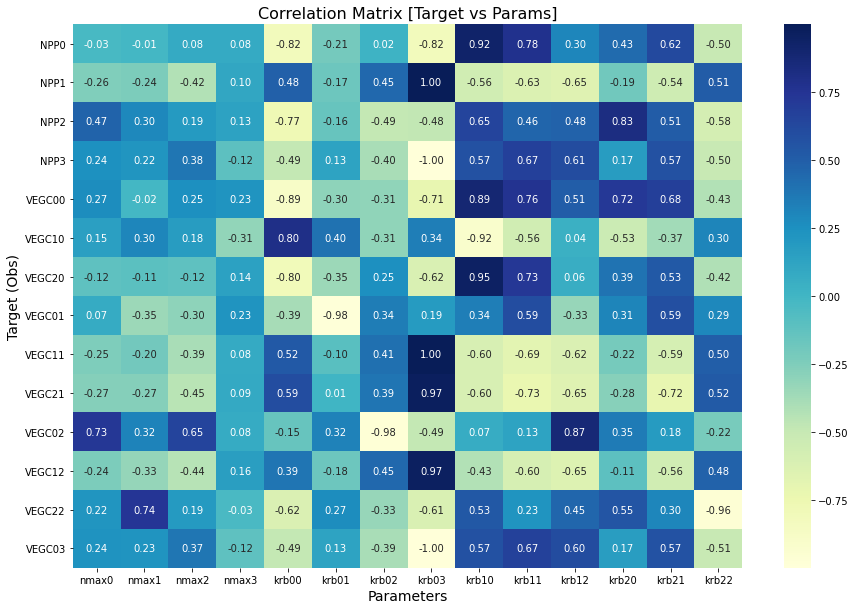

In [99]:
corr_mp=ut.get_output_param_corr(df_param,df_model)

In [ ]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

## (3) cfall -> NPP, VEGC
looks like `krb` does better than `cfall`

In [244]:
model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,113.099537,11.314285,24.092567,32.416541,572.247357,1894.001355,474.516687,8.854014,98.890999,33.179796,6.128400,477.756042,6.992304,136.635738
1,113.129124,11.311682,23.967676,32.428696,572.406653,1893.912549,474.457382,8.693797,98.895387,33.184371,6.193306,477.886221,6.931956,136.517062
2,112.806100,11.306430,23.001747,32.350447,572.558307,1894.152258,475.014114,8.844772,98.840806,32.908180,6.312893,477.784088,6.721720,137.239687
3,113.064712,11.301223,23.850500,32.409065,572.157635,1893.892065,474.580215,8.488667,98.866657,33.248891,6.134916,477.880789,7.172924,136.617705
4,113.095756,11.300740,23.933837,32.412803,572.325629,1894.109656,474.603058,8.409554,98.871724,33.199108,6.159653,477.891086,7.107963,136.580540


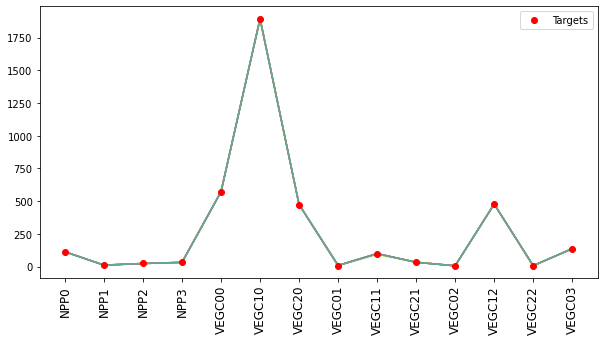

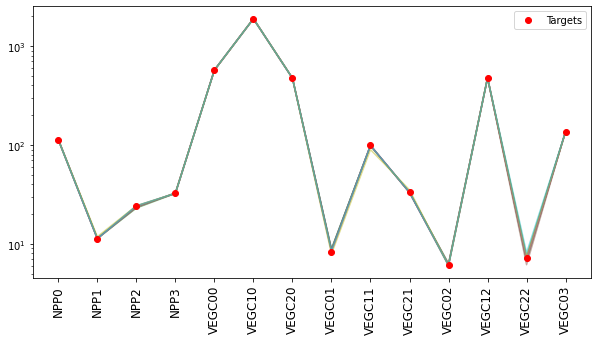

In [245]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

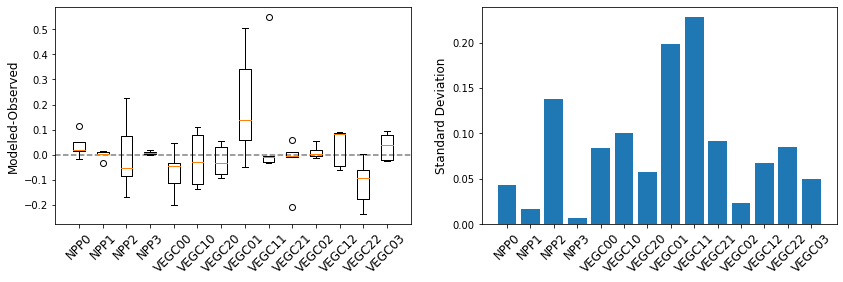

In [246]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

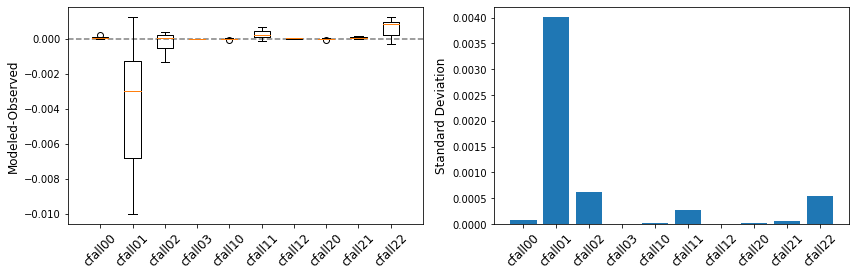

In [247]:
cfall_true_params = [0.001107,0.050722, 0.024987, 0.019928, 0.003407, 0.004790, 
                     0.003590, 0.005149, 0.001171, 0.026025]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,cfall_true_params)

In [122]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

cfall_true_params = [0.001107,0.050722, 0.024987, 0.019928, 0.003407, 0.004790, 
                     0.003590, 0.005149, 0.001171, 0.026025]
cfall=xparams_MD1.iloc[:,:-6].copy()
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cfall00,cfall01,cfall02,cfall03,cfall10,cfall11,cfall12,cfall20,cfall21,cfall22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
4,0.001145,0.049471,0.024465,0.019921,0.003407,0.004882,0.003596,0.005147,0.001197,0.026259,1.000000,0.002616,0.001725,1.000000,0.000413,0.070222
3,0.001097,0.047747,0.025056,0.019918,0.003426,0.004999,0.003592,0.005168,0.001226,0.025740,1.000000,0.009019,0.002021,0.993030,0.001425,0.082253
1,0.001206,0.043919,0.023644,0.019938,0.003391,0.005232,0.003605,0.005130,0.001295,0.027293,1.000000,0.015422,0.006259,0.899757,0.002436,0.254759
0,0.001175,0.040681,0.025365,0.019916,0.003403,0.005452,0.003611,0.005143,0.001353,0.026958,1.000000,0.022681,0.006454,0.894914,0.003583,0.262712
6,0.001320,0.051957,0.025174,0.019931,0.003354,0.004660,0.003612,0.005090,0.001155,0.026862,1.000000,0.031829,0.003215,0.965093,0.005027,0.130937
7,0.001008,0.041137,0.020285,0.019922,0.003442,0.005420,0.003551,0.005186,0.001347,0.024863,1.000000,0.070061,0.009695,0.820219,0.011066,0.394780
9,0.001119,0.047578,0.027743,0.019977,0.003398,0.004984,0.003586,0.005141,0.001218,0.022331,1.000000,0.094033,0.011893,0.770217,0.014853,0.484311
2,0.000885,0.040608,0.020000,0.019806,0.003485,0.005481,0.003562,0.005230,0.001374,0.027195,0.999999,0.173822,0.015343,0.688395,0.027455,0.625117
5,0.001086,0.043483,0.028934,0.020239,0.003538,0.005443,0.003679,0.005301,0.001332,0.030899,0.999998,0.590518,0.022808,0.492075,0.093273,0.933032
8,0.001213,0.059753,0.027613,0.020050,0.003365,0.005128,0.003587,0.005098,0.001013,0.024521,0.999973,6.331091,0.024568,-0.000027,1.000000,1.414214


In [104]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       113.08
NPP1        11.30
NPP2        24.02
NPP3        32.41
VEGC00     572.36
VEGC10    1894.03
VEGC20     474.55
VEGC01       8.35
VEGC11      98.90
VEGC21      33.19
VEGC02       6.14
VEGC12     477.80
VEGC22       7.17
VEGC03     136.54
Name: 10, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
4,113.095756,11.300740,23.933837,32.412803,572.325629,1894.109656,474.603058,8.409554,98.871724,33.199108,6.159653,477.891086,7.107963,136.580540,1.000000,0.002616,0.001725,1.000000,0.000413,0.070222
3,113.064712,11.301223,23.850500,32.409065,572.157635,1893.892065,474.580215,8.488667,98.866657,33.248891,6.134916,477.880789,7.172924,136.617705,1.000000,0.009019,0.002021,0.993030,0.001425,0.082253
1,113.129124,11.311682,23.967676,32.428696,572.406653,1893.912549,474.457382,8.693797,98.895387,33.184371,6.193306,477.886221,6.931956,136.517062,1.000000,0.015422,0.006259,0.899757,0.002436,0.254759
0,113.099537,11.314285,24.092567,32.416541,572.247357,1894.001355,474.516687,8.854014,98.890999,33.179796,6.128400,477.756042,6.992304,136.635738,1.000000,0.022681,0.006454,0.894914,0.003583,0.262712
6,113.192895,11.267954,24.245343,32.420318,572.315698,1894.140894,474.474200,8.302511,99.450613,32.983085,6.142737,477.739853,7.078217,136.514645,1.000000,0.031829,0.003215,0.965093,0.005027,0.130937
7,113.112949,11.313195,23.317358,32.421595,572.795038,1893.964160,474.583405,8.829370,98.903368,33.135664,6.309697,477.861200,7.311704,136.615234,1.000000,0.070061,0.009695,0.820219,0.011066,0.394780
9,113.065276,11.301563,24.254363,32.440657,572.847784,1894.070667,474.332120,8.515081,98.892588,33.306817,6.049938,477.786685,8.097709,136.288139,1.000000,0.094033,0.011893,0.770217,0.014853,0.484311
2,112.806100,11.306430,23.001747,32.350447,572.558307,1894.152258,475.014114,8.844772,98.840806,32.908180,6.312893,477.784088,6.721720,137.239687,0.999999,0.173822,0.015343,0.688395,0.027455,0.625117
5,114.769306,11.448783,23.237466,32.903224,570.905035,1894.009387,474.623300,8.700175,98.833353,33.214328,5.993968,477.611325,6.149811,137.629791,0.999998,0.590518,0.022808,0.492075,0.093273,0.933032
8,112.936101,11.823115,24.274944,32.472922,571.620905,1894.397339,475.197095,7.907327,89.820282,35.198344,6.042251,477.851276,7.534242,135.942935,0.999973,6.331091,0.024568,-0.000027,1.000000,1.414214


## (4) nfall -> NPP, VEGC, VEGN 

In [252]:
model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGN20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN00,VEGN10,VEGN20,VEGN01,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03
0,113.097250,11.298715,23.956505,32.414924,572.311456,1893.918445,474.516269,8.343866,98.881646,33.187730,...,14.789256,30.260995,9.509448,0.385008,2.601188,0.715733,0.572820,12.531396,0.156048,1.148612
1,113.118475,11.300729,24.467259,32.416383,572.224591,1894.283362,474.615625,8.343616,98.947837,33.189893,...,14.786684,30.265419,9.511420,0.384993,2.602771,0.715677,0.572505,12.519738,0.158923,1.148667
2,113.124497,11.300281,23.968338,32.415437,572.308740,1894.208423,474.594836,8.343969,98.901811,33.185247,...,14.789244,30.264700,9.511011,0.385013,2.601647,0.715625,0.573036,12.534499,0.156170,1.148627
3,113.081824,11.296771,23.802499,32.414618,572.324762,1894.041858,474.549747,8.345578,98.902514,33.185812,...,14.789402,30.262448,9.510108,0.385085,2.601710,0.715638,0.572675,12.532701,0.155036,1.148638
4,113.136801,11.300431,24.202577,32.415613,572.310181,1894.423328,474.649408,8.343955,98.917541,33.191874,...,14.789295,30.267613,9.512096,0.385011,2.602016,0.715806,0.572749,12.519277,0.157410,1.148634


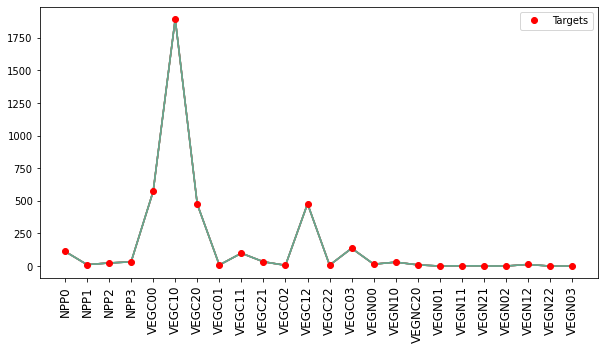

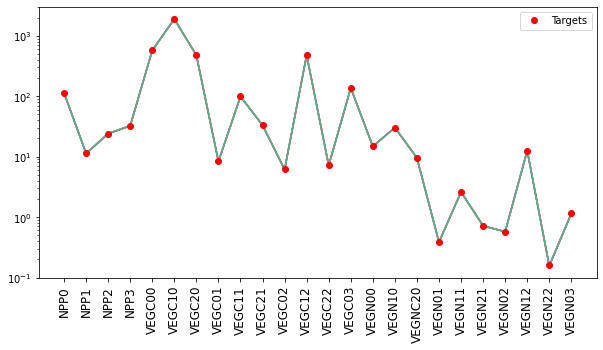

In [249]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

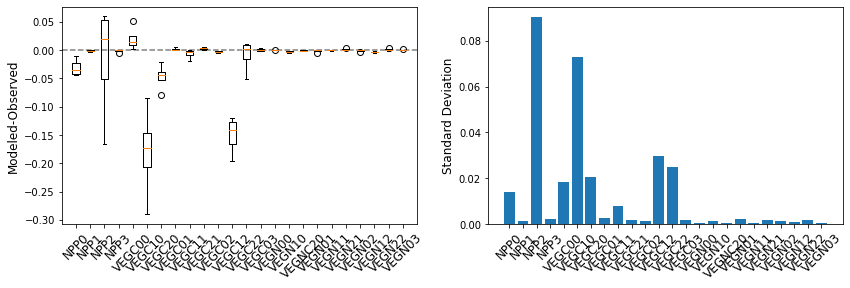

In [250]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

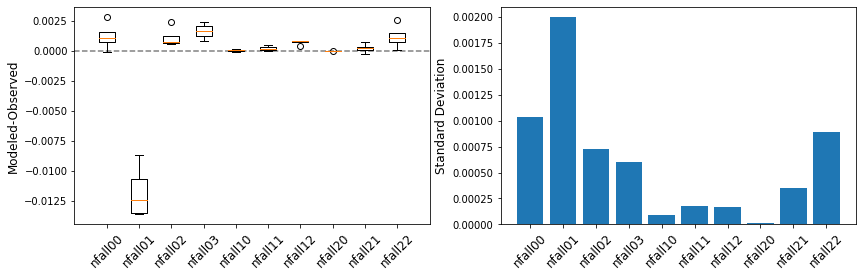

In [251]:
nfall_true_params = [0.010242, 0.044555, 0.017748, 0.007250, 0.001343, 0.001424, 
                     0.005220, 0.003280, 0.007283, 0.007607]
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,nfall_true_params)

In [126]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nfall_true_params = [0.010242, 0.044555, 0.017748, 0.007250, 0.001343, 0.001424, 
                     0.005220, 0.003280, 0.007283, 0.007607]
nfall=xparams_MD1.iloc[:,:-6].copy()
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]
nfall 


,nfall00,nfall01,nfall02,nfall03,nfall10,nfall11,nfall12,nfall20,nfall21,nfall22
0,0.009052,0.039765,0.017571,0.006755,0.001496,0.001281,0.005193,0.003274,0.006753,0.007698
1,0.011753,0.036753,0.017430,0.006611,0.001074,0.001191,0.005811,0.003368,0.006252,0.006276
2,0.009115,0.053265,0.017024,0.005897,0.001402,0.001189,0.004376,0.003302,0.006532,0.006585
3,0.010132,0.041908,0.019383,0.008338,0.001557,0.001186,0.004804,0.003276,0.006709,0.006625
4,0.011239,0.049722,0.016988,0.006415,0.001136,0.001538,0.005116,0.003319,0.008118,0.007143
5,0.010123,0.043570,0.016491,0.005841,0.001529,0.001318,0.005199,0.003246,0.007424,0.009044
6,0.011126,0.046491,0.016529,0.005921,0.001080,0.001696,0.004699,0.003337,0.007237,0.007118
7,0.011970,0.042683,0.019056,0.008674,0.001600,0.001140,0.005442,0.003226,0.007680,0.009000
8,0.011948,0.039643,0.017852,0.007843,0.001377,0.001657,0.005162,0.003258,0.006289,0.009128
9,0.008820,0.046734,0.018382,0.007095,0.001610,0.001474,0.004434,0.003265,0.007215,0.006889


## (5) soil param -> NPP, VEGC,VEGN, SoilC

In [254]:
#these are still running 
model='out-csoil-md1-r-EJ.finalresults.csv'
params='param-csoil-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGN20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03',   
                   'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']                
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
               
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum
0,91.101982,4.395089,2.801366,32.299038,571.235138,1504.885840,379.849893,6.167926,13.043228,8.438562,...,0.357575,0.233470,0.295837,1.048466,0.013241,1.143718,603.266406,1140.521000,4666.473418,15.272514
1,85.954255,3.962952,2.569098,32.296305,570.301709,1448.336792,365.170352,5.942549,9.877080,8.031134,...,0.281523,0.226348,0.283886,0.982266,0.011986,1.143658,602.753462,1140.274664,4664.902467,13.231595
2,96.967214,4.965112,3.047160,32.297348,573.093018,1595.170410,402.527451,6.404292,19.083084,8.281326,...,0.507409,0.215844,0.308308,1.154843,0.014758,1.143716,605.061147,1141.955821,4672.199103,16.275118
3,100.307633,5.455486,3.236494,32.303026,573.026385,1650.115503,416.056052,6.544950,24.982721,9.492244,...,0.660293,0.233129,0.316456,1.234744,0.015942,1.143907,603.323675,1139.280508,4663.701895,21.093561
4,88.677044,4.182955,2.692093,32.299642,570.545062,1482.569543,374.016824,6.061773,11.606646,8.097690,...,0.322500,0.225781,0.290546,1.021143,0.012696,1.143743,602.099714,1137.386302,4668.308107,15.725857


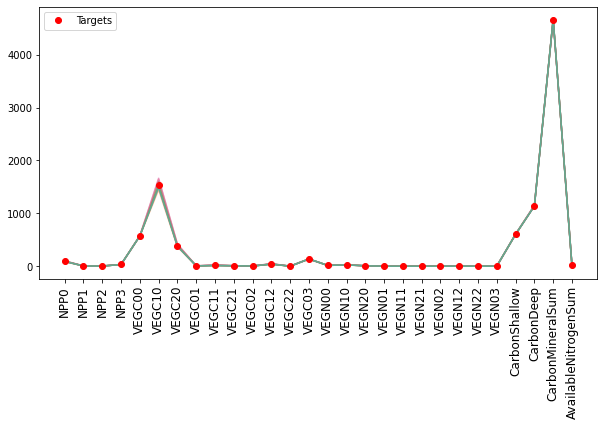

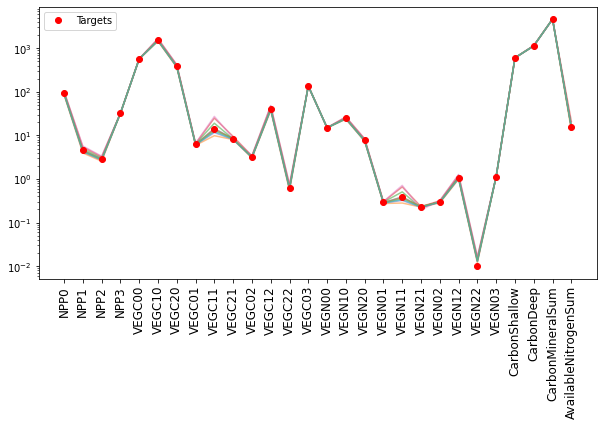

In [255]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

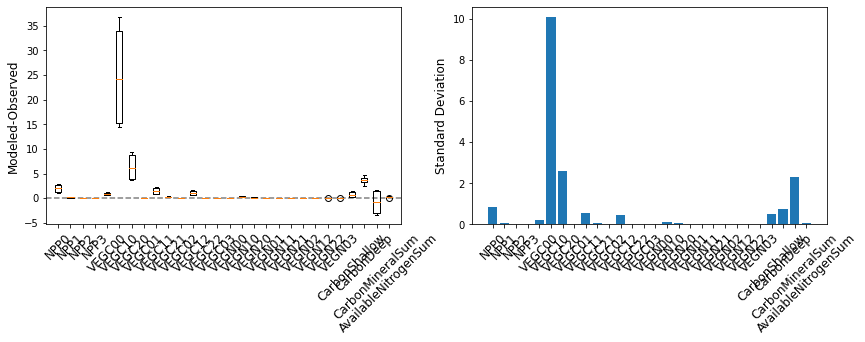

In [256]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])

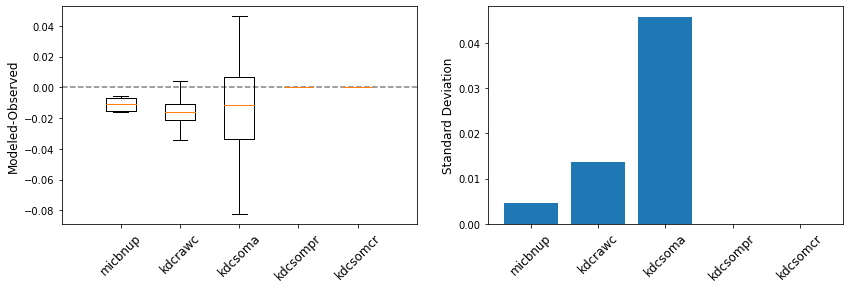

In [257]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
par_value_minus_mean_box_plot(x_sort,true_params)

In [260]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,CarbonShallow,CarbonDeep,CarbonMineralSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
5,93.036651,4.561938,2.884032,32.298530,571.804919,1528.721313,386.014371,6.244694,14.428999,8.390719,...,604.330170,1139.901240,4662.191974,15.391561,1.000000,0.232629,0.011855,1.000000,0.000304,0.106270
7,92.560354,4.520023,2.865035,32.299501,571.491821,1522.545764,384.431143,6.224414,14.034912,8.353986,...,604.236874,1139.199866,4662.284558,15.510142,0.999999,0.583987,0.013542,0.991306,0.000763,0.121401
0,91.101982,4.395089,2.801366,32.299038,571.235138,1504.885840,379.849893,6.167926,13.043228,8.438562,...,603.266406,1140.521000,4666.473418,15.272514,0.999978,18.531413,0.026422,0.914963,0.024216,0.238087
8,90.859246,4.373039,2.787552,32.298477,571.275146,1504.028589,379.570230,6.160169,12.997582,8.507337,...,603.389174,1141.275843,4666.722865,15.434313,0.999976,20.141384,0.027692,0.907538,0.026320,0.249632
9,89.853434,4.288843,2.751130,32.300894,570.599323,1489.507996,375.947342,6.115040,12.088006,8.120915,...,603.078567,1136.635664,4665.108892,15.136445,0.999936,53.077749,0.040438,0.822048,0.069359,0.369077
4,88.677044,4.182955,2.692093,32.299642,570.545062,1482.569543,374.016824,6.061773,11.606646,8.097690,...,602.099714,1137.386302,4668.308107,15.725857,0.999908,76.005255,0.049025,0.763970,0.099320,0.450562
2,96.967214,4.965112,3.047160,32.297348,573.093018,1595.170410,402.527451,6.404292,19.083084,8.281326,...,605.061147,1141.955821,4672.199103,16.275118,0.999778,185.796394,0.057777,0.648190,0.242790,0.572017
1,85.954255,3.962952,2.569098,32.296305,570.301709,1448.336792,365.170352,5.942549,9.877080,8.031134,...,602.753462,1140.274664,4664.902467,13.231595,0.999714,235.320640,0.083845,0.485024,0.307506,0.812090
3,100.307633,5.455486,3.236494,32.303026,573.026385,1650.115503,416.056052,6.544950,24.982721,9.492244,...,603.323675,1139.280508,4663.701895,21.093561,0.999295,590.146281,0.102054,0.161379,0.771174,1.196522
6,101.761696,5.723597,3.348518,32.307308,573.184235,1665.923474,420.202368,6.606208,27.356123,8.730092,...,607.765788,1159.663618,4658.927164,16.381131,0.999088,765.257007,0.111553,-0.000912,1.000000,1.414214


In [ ]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
[nrows, ncols]=df_param.shape
score=[]
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
rmse=[mean_squared_error(df_param.iloc[i], true_params) for i in range(nrows)]
rmse

df_rmse = pd.Series( rmse,  name = 'RMSE'  )
result = pd.concat([df_param, df_rmse], axis=1)
result

In [ ]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='RMSE'
nelem=10
order=True
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem]

In [ ]:
rmetric='RMSE'
result.sort_values(by=[rmetric],ascending=order)[:nelem]

In [ ]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007] 